<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Supervised-Learning" data-toc-modified-id="Supervised-Learning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Supervised Learning</a></span></li><li><span><a href="#Unsupervised-Learning" data-toc-modified-id="Unsupervised-Learning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Unsupervised Learning</a></span></li><li><span><a href="#Within-Cluster-Variation" data-toc-modified-id="Within-Cluster-Variation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Within Cluster Variation</a></span></li></ul></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K Means</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span><ul class="toc-item"><li><span><a href="#Cluster-the-iris-data,-comparing-the-various-clus-methos-and-linkage-methods-as-well-as-number-of-clusters" data-toc-modified-id="Cluster-the-iris-data,-comparing-the-various-clus-methos-and-linkage-methods-as-well-as-number-of-clusters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cluster the iris data, comparing the various clus methos and linkage methods as well as number of clusters</a></span></li><li><span><a href="#Cluster-the-MNIST-Handwritten-digits:" data-toc-modified-id="Cluster-the-MNIST-Handwritten-digits:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cluster the MNIST Handwritten digits:</a></span></li><li><span><a href="#Cluster-the-Titanic-data,-comparing-the-various-clus-methos-and-linkage-methods-as-well-as-number-of-clusters" data-toc-modified-id="Cluster-the-Titanic-data,-comparing-the-various-clus-methos-and-linkage-methods-as-well-as-number-of-clusters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cluster the Titanic data, comparing the various clus methos and linkage methods as well as number of clusters</a></span></li></ul></li></ul></div>

# Clustering Intro

In [1]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


print('codes for toggling codes')
hide_toggle()

codes for toggling codes


__Clustering__ refers to a very broad set of techniques for finding subgroups, or clusters, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other.

Of course, to make this concrete, we must define what it means for two or more observations to be similar or different. Indeed, this is often a domain-specific consideration that must be made based on knowledge of the data being studied.

We have encountered the two main ingredients __similarity of observations__ and __partitioning observations into distinct groups__ before:
<img src="img/KNN_K_10.png"/>
<img src="img/tree_titanic.png"/>



## Motivation 
### Supervised Learning 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, decomposition, datasets, cluster, metrics
import pandas as pd
import seaborn as sns
from skimage import transform

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
hide_toggle()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

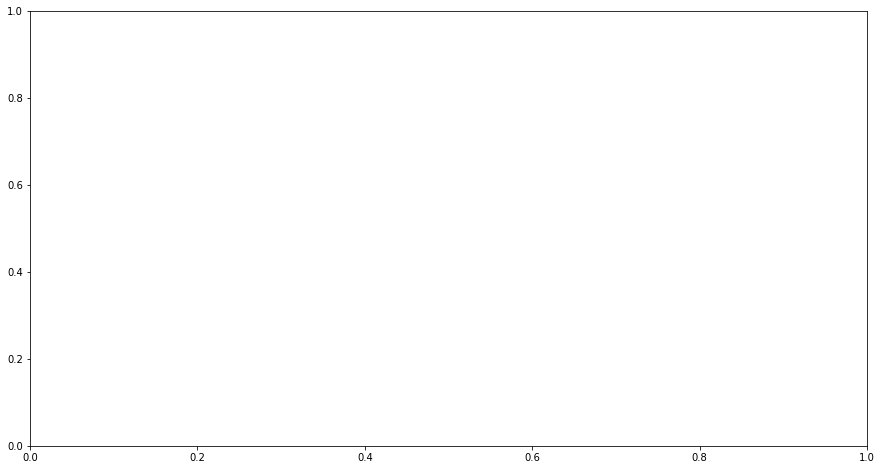

In [6]:
iris = datasets.load_iris()
iris_y = iris.target
iris_yNames = dict(zip([i for i in range(len(iris.target_names))],iris.target_names))
iris_y = np.array([iris_yNames[number] for number in iris_y])
iris_x = pd.DataFrame(iris.data, columns= iris.feature_names)

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=iris_x.loc[:,'petal length (cm)'], y=iris_x.loc[:,'petal width (cm)'], hue=iris_y)
hide_toggle()

### Unsupervised Learning 

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=iris_x.loc[:,'petal length (cm)'], y=iris_x.loc[:,'petal width (cm)'])
hide_toggle()

### Within Cluster Variation 

Add up all pairwise distances within each cluster $C_k$:

$$
W = \frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p(x_{ij} - x_{i'j})^2
$$

Can you rewrite in terms of L2 norm:

$$
  ||X_{i} - X_{i'} ||_2^2 =  \sum_{j=1}^p(x_{ij} - x_{i'j})^2
$$


We can show that this is equal to a much simpler expression:
  
$$
    \frac{1}{2} W = \sum_{i \in C_k}{||X_{i} - \bar{X_{k}} ||_2^2}
$$

We want to minimize:
  
$$
    \sum_{k=1}^{K}{ \sum_{i \in C_k}{||X_{i} - \bar{X_{k}} ||_2^2} }
$$


Please compute the within cluster variation for the iris data set for 2 suitably chosen clusters!


## K Means

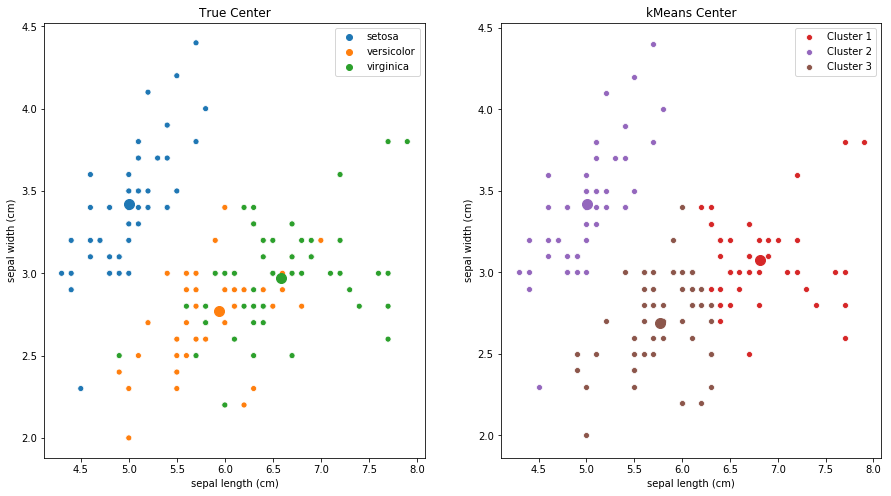

In [5]:
kMeans_iris_n3 = cluster.KMeans(n_clusters=3).fit(iris_x.iloc[:,0:2])
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.scatterplot(x=iris_x.loc[:,'sepal length (cm)'], y=iris_x.loc[:,'sepal width (cm)'], hue=iris_y, ax=ax1)
for i in range(3):
    centers = np.mean(iris_x.iloc[iris.target==i,:])
    ax1.scatter(centers[0], centers[1],s=100, c=sns.color_palette()[i])
ax1.set_title('True Center')

prediction = kMeans_iris_n3.predict(iris_x.iloc[:,0:2])
for i in range(3):
    filter_ = prediction == i
    sns.scatterplot(x=iris_x.loc[filter_,'sepal length (cm)'],
                    y=iris_x.loc[filter_,'sepal width (cm)'],
                    c=sns.color_palette()[i+3], ax=ax2, label = 'Cluster %s'%str(i+1))
    centers = kMeans_iris_n3.cluster_centers_[i,0:2]
    ax2.scatter(centers[0], centers[1],s=100, c=sns.color_palette()[i+3])
ax2.set_title('kMeans Center')
hide_toggle()


For calcuation of homogeneity and completeness score, please see https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness


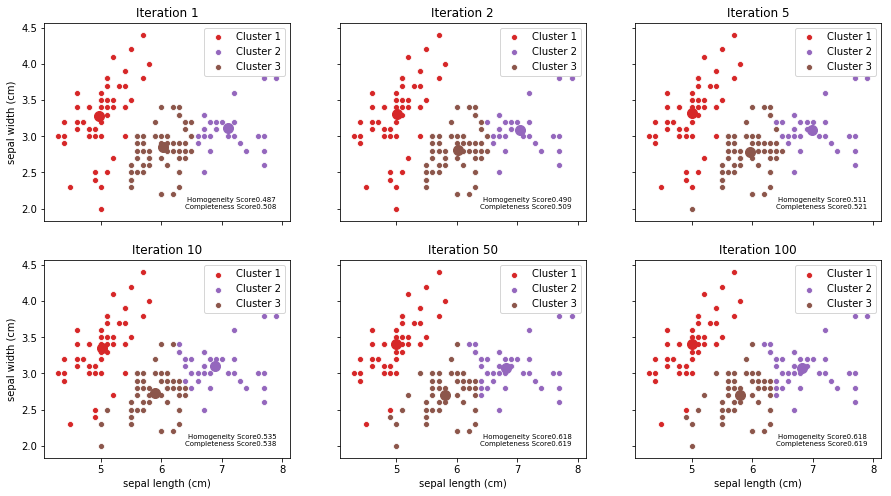

In [6]:
# THIS IS ONLY A SIMULATION, NOT THE ACTUAL ITERATION HAPPENED IN THE ALGO
trials = [1,2,5,10,50,100]
fig, axs = plt.subplots(2,3, figsize=(15, 8), sharex=True, sharey=True)
axs = np.reshape(axs,len(trials))
for i, N in enumerate(trials):
    kmeans_temp = cluster.KMeans(n_clusters=3,
                                 n_init=1,
                                 max_iter=N, 
                                 random_state=0,
                                 tol=0.0000000001).fit(iris_x.iloc[:,0:2])
    
    prediction = kmeans_temp.predict(iris_x.iloc[:,0:2])
    for j in range(3):
        filter_ = prediction == j
        sns.scatterplot(x=iris_x.loc[filter_,'sepal length (cm)'],
                    y=iris_x.loc[filter_,'sepal width (cm)'],
                    c=sns.color_palette()[j+3], ax=axs[i], label = 'Cluster %s'%str(j+1))
        centers = kmeans_temp.cluster_centers_[j,0:2]
        axs[i].scatter(centers[0], centers[1],s=100, c=sns.color_palette()[j+3])
    axs[i].set_title('Iteration %s'%str(N))
    
    text = 'Homogeneity Score'+"%.3f" %round(metrics.homogeneity_score(iris.target, kmeans_temp.predict(iris_x.iloc[:,:2])), 3)+'\n'+\
           'Completeness Score'+"%.3f" %round(metrics.completeness_score(iris.target, kmeans_temp.predict(iris_x.iloc[:,:2])), 3)

    axs[i].text(s=text,
                x=np.max(iris_x.iloc[:,0]), y=np.min(iris_x.iloc[:,1]), ha='right', fontsize=7)

print("For calcuation of homogeneity and completeness score,", 
      "please see https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness")

hide_toggle()


<img src="img/kMeans_iter1.png"/>
<img src="img/kMeans_iter2.png"/>
<img src="img/kMeans_iter3.png"/>
- Rerun many times!!

<font size='4'> Exercise: Compute the gap statistics for various number of clusters </font>


## Hierarchical Clustering
- All we need is a distance matrix

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
iris_x_normalized = preprocessing.scale(iris_x, axis=0)
Z = linkage(iris_x_normalized,method='average')
Z[:10,:]
hide_toggle()


### Exercise


Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
$$
\begin{pmatrix} &0.3 &0.4 &0.7 \cr 0.3 & &0.5 &0.8 \cr 0.4 &0.5 & & 0.45 \cr 0.7 &0.8 &0.45 & \end{pmatrix}
$$
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using **single linkage**. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

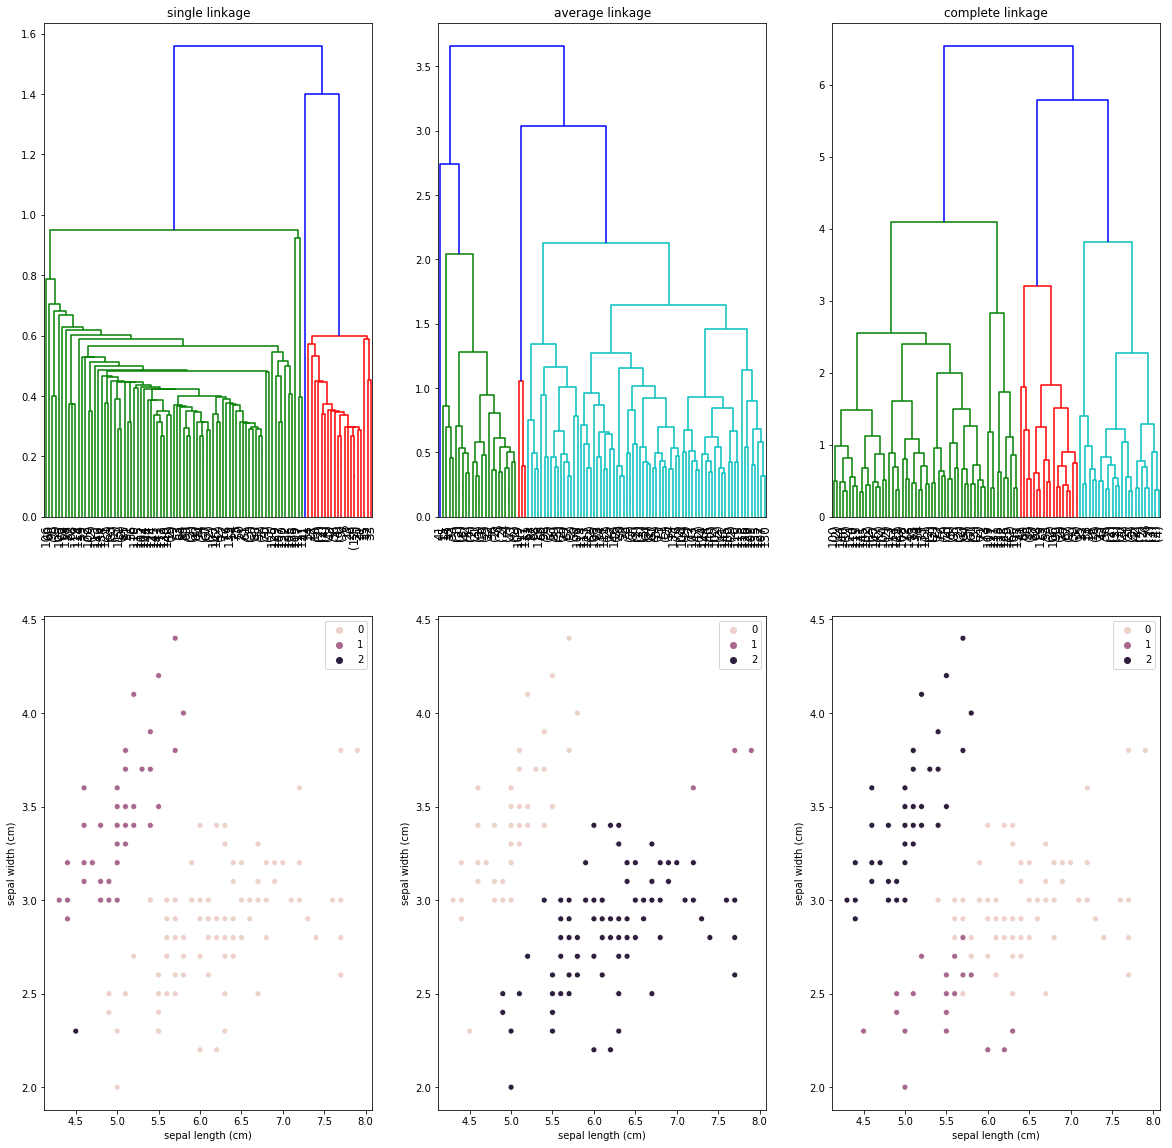

In [8]:
fig, axs = plt.subplots(2,3, figsize=(20, 20), sharex=False, sharey=False)

methods = ['single', 'average', 'complete'] # Also support Ward

for i, m in enumerate(methods):
    Z = linkage(iris_x_normalized,method=m)
    dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
        p=100,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        ax=axs[0,i])
    
    clusters_of_3 = fcluster(Z, 3, criterion='maxclust')
    sns.scatterplot(x=iris_x.loc[:,'sepal length (cm)'],
                    y=iris_x.loc[:,'sepal width (cm)'],
                    hue=clusters_of_3-1,ax=axs[1,i])
    axs[0,i].set_title(m+' linkage')
hide_toggle()


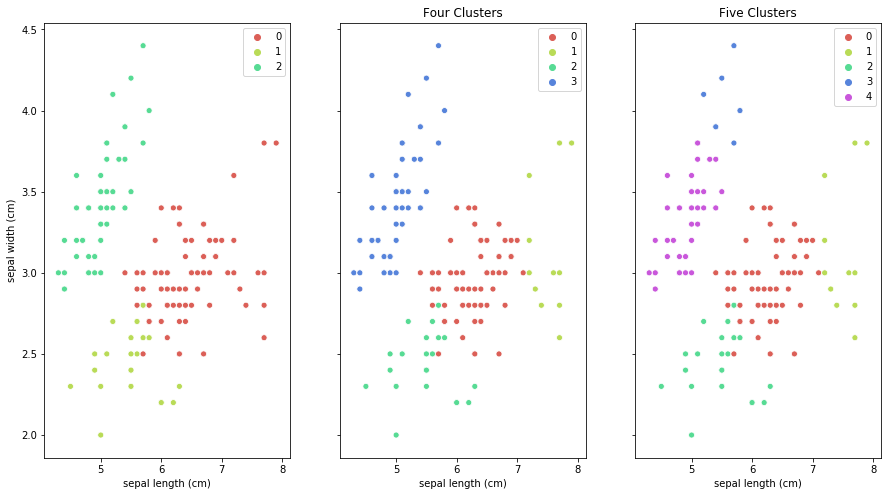

In [9]:
fig, axs = plt.subplots(1,3, figsize=(15, 8), sharex=True, sharey=True)
color_palette = sns.color_palette("hls", 5)

clusters_of_3 = fcluster(Z, 3, criterion='maxclust')
sns.scatterplot(x=iris_x.loc[:,'sepal length (cm)'],
                    y=iris_x.loc[:,'sepal width (cm)'],
                    hue=clusters_of_3-1,ax=axs[0], palette=color_palette[:3])
axs[1].set_title('Three Clusters')

clusters_of_4 = fcluster(Z, 4, criterion='maxclust')
sns.scatterplot(x=iris_x.loc[:,'sepal length (cm)'],
                    y=iris_x.loc[:,'sepal width (cm)'],
                    hue=clusters_of_4-1,ax=axs[1],palette=color_palette[:4] )
axs[1].set_title('Four Clusters')


clusters_of_5 = fcluster(Z, 5, criterion='maxclust')
sns.scatterplot(x=iris_x.loc[:,'sepal length (cm)'],
                    y=iris_x.loc[:,'sepal width (cm)'],
                    hue=clusters_of_5-1,ax=axs[2],palette=color_palette[:5] )
axs[2].set_title('Five Clusters')

hide_toggle()


In [10]:
for i in np.unique(clusters_of_4):
    print('cluster '+str(i),':',sum(clusters_of_4==i))
    
hide_toggle()


cluster 1 : 66
cluster 2 : 11
cluster 3 : 24
cluster 4 : 49


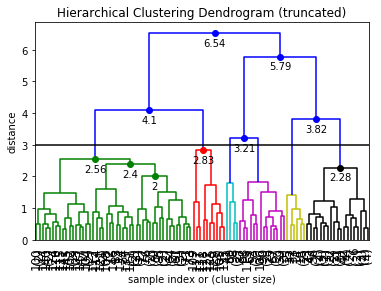

In [11]:
# from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.hlines(y=max_d,xmin=0, xmax=1000)
    return ddata

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=100,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,
    max_d=3,
)
hide_toggle()


## Exercises 
### Cluster the iris data, comparing the various clus methos and linkage methods as well as number of clusters

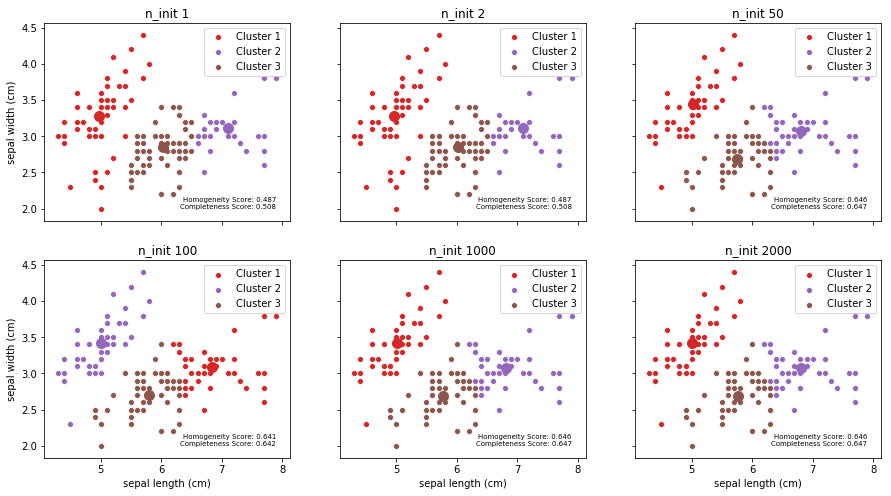

In [12]:
 
hide_toggle()

### Cluster the MNIST Handwritten digits:

The digits dataset has shape: (1797, 64) . It means there are 1797 digits images, each with 64 pixels


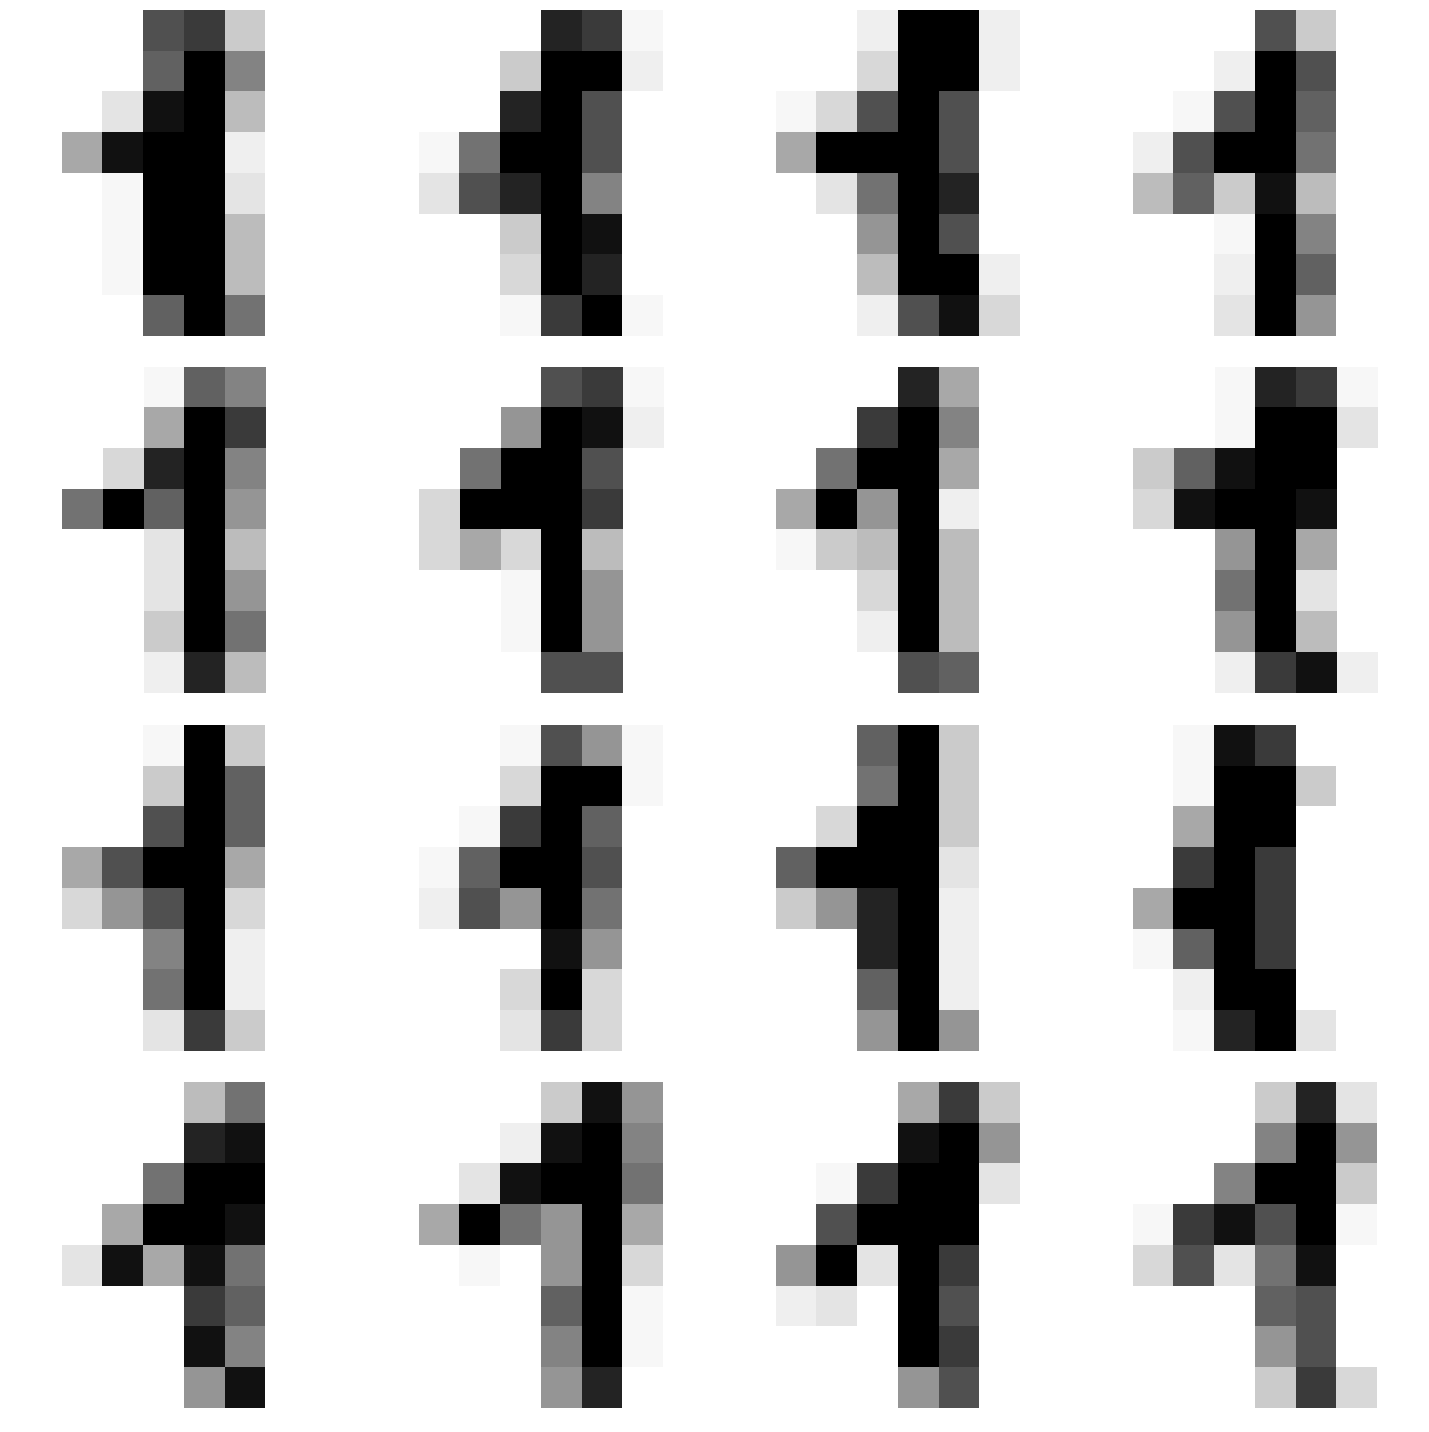

In [13]:
from commonUtils import plotDigits

# Digits Dataset
digits = datasets.load_digits()
print('The digits dataset has shape:',digits.data.shape, '. It means there are 1797 digits images, each with 64 pixels')

# Before reshape
digits_array = digits.data

# Reshape 
digits_img = np.reshape(digits.data, (-1,8,8)) # -1 means ignore the dimension when reshape

# Get target
digits_y = digits.target
 
plotDigits(digits_img, targetFilter=digits_y==1)

hide_toggle()
